# Guided Project: Investigating Fandango Movie Ratings 

## Table of Contents 
1. [Introduction](#introduction)
2. [Understanding the Data](#understanding-data)
3. [Changing the Goal of our Analysis ](#changing-goal)
4. [Isolating the Samples We Need ](#isolating-samples)
5. [Comparing Distribution Shapes for 2015 and 2016](#comparing-dist)
6. [Comparing Relative Frequencies ](#comparing-freq)
7. [Determining the Direction of the Change](#determining-dir)
8. [Final Conclusion](#final-concl)


## Introduction <a name="introduction"></a>

This is a project I completed based on a guide called "Investigating Fandango Movie Ratings" on the Dataquest learning platform. 

In this project I have learned new skills related to practical data analysis with statistics, in particular sampling, variables, scales of measurement, and frequency distribution. 

The implementation is written in Python, using pandas, numpy and matplotlib libraries, and is shown in Jupyter Notebooks.

### Goal of this project

The goal of this project is to investigate whether the platform Fandango is (still) inflating their movie ratings, compared to actual ratings. The original comparison was done by a data analyst named Hickey, based on movies released until 2015. The goal is to compare whether the ratings are still inflated by doing a similar investigation on the data from movies released in 2016 & 2017.

![fandango.png](img/fandango/fandango.png)

Source: [Five Thirty Eight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

## Understanding the Data <a name="understanding-data"></a>

### Import the dependencies
First we need to import the required libraries: pandas, numpy and matplotlib.pyplot.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load and explore the data
The result of the movie ratings are stored in 2 files:
1. fandango_score_comparison.csv contains movies investigated by Hickey in 2015 (from now on known as "2015 data")
2. movie_ratings_16_17.csv contains movies released in 2016 & 2017 (from now on known as "2016/17 data")

In [96]:
# load movies files into dataframes
mv_15 = pd.read_csv("data/fandango/fandango_score_comparison.csv")
mv_16_17 = pd.read_csv("data/fandango/movie_ratings_16_17.csv")

In [97]:
# explore the 2015 data
mv_15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


There are 22 columns in the 2015 dataset. Most of the columns are not necessary for our purpose, such as the columns associated with movie ratings platforms other than Fandango. We will isolate the columns `FILM`, `Fandango_Stars`, `Fandango_Ratingvalue`, `Fandango_votes`, `Fandango_Difference` in the next step.

In [98]:
# select require columns and show reduced width dataframe of 2015 data. 
# Note: to avoid chained indexing and eliminate the SettingWithCopyWarning, create a copy of the dataframe with .copy()
fandango_15 = mv_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [99]:
# explore the 2016/17 data
mv_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


There are 15 columns in the 2016/17 dataset. Again, most are superfluous and we will isolate the columns `movie`, `year`, `fandango` in the next step.

In [100]:
# select require columns and show reduced width dataframe of 2016/17 data
# Note: to avoid chained indexing and eliminate the SettingWithCopyWarning, create a copy of the dataframe with .copy()
fandango_16_17 = mv_16_17[['movie', 'year', 'fandango']].copy()
fandango_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Observations
Some initial observations about the 2 data sets
1. The first column contains the movie name, however, with the 2015 data set the year of release in included in brackets in the name. 
2. With the 2016/2017 data set, the year is a separate column.

#### Define the population of interest and checking the sampling
The population of interest are all movies rated on Fandango. This will enable us to check for any differences in the ratings before and after the analysis.

According to Hicky, only movies with at least 30 reviews were selected for analysis in the 2015 data set.
For the 2016/2017 data set, its less clear: its stated on Gitgub that it contains: 
> the most popular movies (with a significant number of votes) released in 2016 and 2017

Therefore, sampling was not random. 

Also, as these two datasets are based on different time periods, we cannot use it to compare whether the same movie's rating has changed or not. Therefore, both these datasets are not of use for our goals.

## Changing the Goal of our Analysis <a name="changing-goal"></a>
As we don't have the required scope of data for our goal, the next-best goal would be to compare the ratings of all *popular* movies in 2 periods, namely popular movies in 2015 vs popular movies 2016, and checkfor any differences.
We can take Hickey's definition of *popular* as a movie which has at least 30 reviews. 
- For the 2015 we can take the column `Fandango_votes`, and determine whether most (if not all) of a sample has >= 30 fan ratings. 
- For the 2016 dataset, we're best-off taking a sample and manually check the current number of reviews on the internet.

## Isolating the Samples We Need <a name="isolating-samples"></a>
Firstly, let's get a random sample of the 2016 dataset and manually check that each movie has at least 30 ratings.

In [101]:
fandango_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As can be seen above, there are no rating counts in the dataset provided on GitHub, so one has to manually check the Fandango website to get them. Here are the number of ratings on fandango.com, as of April 2018:

| Movie                                      | Fan ratings |
|--------------------------------------------|-------------|
| Mechanic: Resurrection                    | 2247        |
| Warcraft                                  | 7271        |
| Max Steel                                 | 493         |
| Me Before You                             | 5263        |
| Fantastic Beasts and Where to Find Them   | 13400       |
| Cell                                      | 17          |
| Genius                                    | 127         |
| Sully                                     | 11877       |
| A Hologram for the King                   | 500         |
| Captain America: Civil War                | 35057       |

As can be seen above, 9/10 movies have >= 30 ratings, which is sufficient. 

Now let us check the 2015 dataset, if it has **any** movies with < 30 ratings.

In [102]:
len(fandango_15[fandango_15['Fandango_votes'] < 30])

0

For our analysis, we need to isolate the movies released in 2015 and 2016 into 2 separate datasets.
#### Older dataset (2015)
For the older dataset, the release year is in the column `FILM`. We will create a derived column called `Year` and then filter the data for 2015

In [103]:
# older dataset, create a derived column year from column `FILM` and then filter out data for year 2015
fandango_15['Year'] = (fandango_15['FILM'].str[-5:-1]).astype(int)
old = fandango_15[fandango_15['Year'] == 2015].copy()

Do a visual check: counts of and preview the dataframe


In [104]:
old['Year'].value_counts()

Year
2015    129
Name: count, dtype: int64

In [105]:
old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Let's also preview the values of the column `Fandango_Stars``, as this is the column we're interested in for our analysis


In [106]:
old['Fandango_Stars'].value_counts()

Fandango_Stars
4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: count, dtype: int64

#### Newer dataset (2016)
For the newer dataset, we can easily filter for 2016 data using the column `year`

In [107]:
new = fandango_16_17[fandango_16_17['year'] == 2016].copy()
# let's also preview the values of the column 'fandango', as this is the column we're interested in for our analysis
new['fandango'].value_counts()

fandango
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: count, dtype: int64

Do a visual check: counts of and preview the dataframe

In [108]:
new['year'].value_counts()

year
2016    191
Name: count, dtype: int64

In [109]:
new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


Let's also preview the values of the column `fandango`, as this is the column we're interested in for our analysis


In [110]:
new['fandango'].value_counts()

fandango
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: count, dtype: int64

### Observation
We now have the 2 sufficient datasets (from now on referred to as *distributions*) to do our comparison.

## Comparing Distribution Shapes for 2015 and 2016 <a name="comparing-dist"></a>
Start by doing a high-level comparison of the 2 datasets, to see whether there is a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

Below are two kernel density plots generated, showing the shapes of the distributions of ratings for 2015 and 2016. 

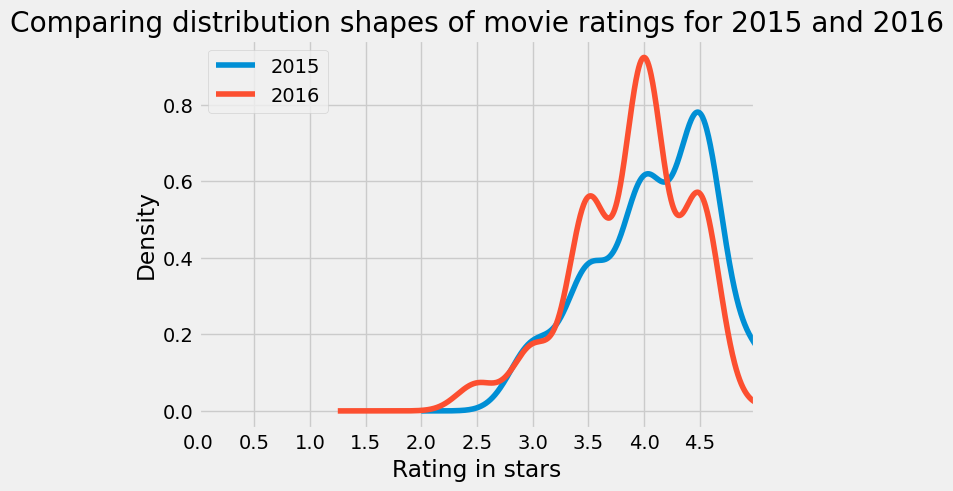

In [111]:
# use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# generate KDE plots from each distribution
old['Fandango_Stars'].plot.kde(label = '2015', legend=True)
new['fandango'].plot.kde(label = '2016', legend=True)

# customise the plot
plt.title("Comparing distribution shapes of movie ratings for 2015 and 2016")
plt.xlabel("Rating in stars")
plt.xlim(0,5)
plt.xticks(np.arange(0.0,5,0.5))
plt.legend()
plt.show()

### Observation
By generating 2 kernel density plots, one can see that:
1. both distributions are skewed to the right
2. the shapes are fairly similiar
3. the main differentiator in the shapes are the peak densities's ratings: 
    - for 2015, its around 4.5
    - for 2016, its around 4.0
4. considering point no. 3, there is evidence that there was indeed a change in Fandango's popular movies between 2015 and 2016: it seems that the movies were rated lower in 2016.

## Comparing Relative Frequencies <a name="comparing-freq"></a>
In order to look at the information at a more granular level, we introduce frequency distribution tables. 

For 2015 and 2016, using absolute counts:

In [112]:
# show absolute frequency table for 2015
print('For 2015' + '\n' + '--------')
old['Fandango_Stars'].value_counts().sort_index()

For 2015
--------


Fandango_Stars
3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: count, dtype: int64

In [113]:
# show absolute frequency table for 2016
print('For 2016' + '\n' + '--------')
new['fandango'].value_counts().sort_index()

For 2016
--------


fandango
2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: count, dtype: int64

One can see above that there are different numbers of movies in the two distributions, therefore a comparison using relative frequencies would be better.
(using percentages is better for readability, in my opinion)

In [114]:
# show relative frequency table for 2015
print('For 2015' + '\n' + '--------')
old['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

For 2015
--------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [115]:
# show relative frequency table for 2016
print('For 2016' + '\n' + '--------')
new['fandango'].value_counts(normalize=True).sort_index()*100

For 2016
--------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

### Observation
Its still clear that there is a difference in the distributions. For example, it appears that the % of all ratings for 4.0 and 4.5 stars were inverted between 2015 and 2016. Also, 2016 only has 0.5% of 5 star ratings, compared to 7% of 5 star ratings in 2015. 

Regarding the direction of the diffence, using the tables one can be almost certain that the ratings have decreased from 2015 to 2016. For all ratings except 4.0, there has been a decrease in % of the rating stars from 2015 to 2016.

## Determining the Direction of the Change <a name="determining-dir"></a>
With the 2 distributions, we now calculate *summary statistics* for the mean, median and mode of each data set's ratings.  

In [116]:
# get summary statistics of each distribution's data set and store in one dataframe
old_mean = old['Fandango_Stars'].mean()
old_median = old['Fandango_Stars'].median()
old_mode = old['Fandango_Stars'].mode()[0] # mode outputs two values, use the non-zero one
new_mean = new['fandango'].mean()
new_median = new['fandango'].median()
new_mode = new['fandango'].mode()[0] # mode outputs two values, use the non-zero one

summ_stats = pd.DataFrame()
summ_stats['2015'] = [old_mean, old_median, old_mode]
summ_stats['2016'] = [new_mean, new_median, new_mode]
summ_stats.index = ['mean', 'median', 'mode']
summ_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


To visualise the above, generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016

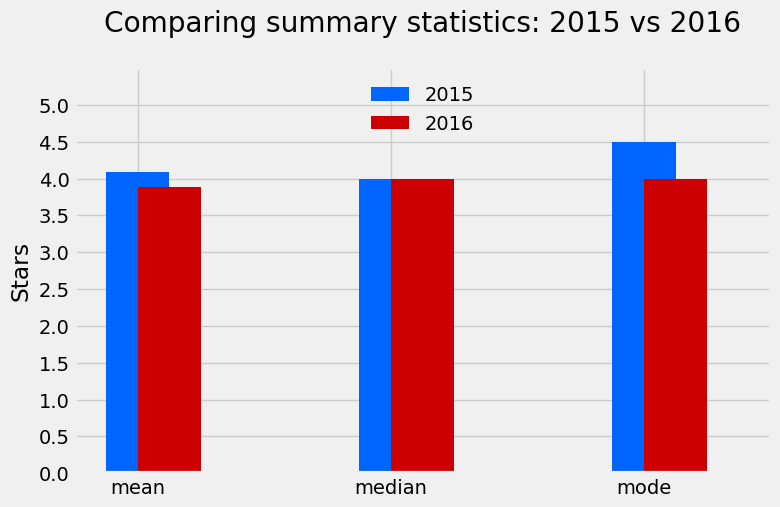

In [117]:
summ_stats['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summ_stats['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

### Observation
As seen by calculating the summary statistics, and then visualising on a chart, one can tell the direction of the difference. 
- For the **median**, there is a **decrease of rougly 0.2** from 2015 to 2016. 
- What's interesting with the **mode**: its value **decreased with 0.5** from 2015 to 2016, revealing that 4.5 ratings are not so common anymore. Although this gives us already an indication about the direction of the difference, we should employ further methods to confirm this.

## Final Conclusion  <a name="final-concl"></a>

Although the data available to us was not perfect, using an acceptable sample from the Fandango data captured after Hickey's analysis allowed us to revise our goal, analyse the data using different methods, and make a conclusion. 

There was a slight decrease in the values of ratings after Hickey's analysis.